In [41]:
# KNN Classification
import pandas as pd
#from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [42]:
dataframe=pd.read_csv("C:\\Users\\HP\\Downloads\\glass.csv")
dataframe.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [43]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [44]:
dataframe.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [45]:
dataframe.shape

(214, 10)

In [46]:
dataframe.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

There is no null values in the data 

In [47]:
dataframe[dataframe.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [48]:
dataframe = dataframe.drop_duplicates()

In [49]:
dataframe[dataframe.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


In [50]:
dataframe.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [51]:
corr = dataframe.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


In [52]:
x= dataframe.iloc[:, 0:9]
y= dataframe.iloc[:, -1]

In [53]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [54]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 213, dtype: int64

In [55]:
y.value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

To Standardize the data

In [56]:
scale=StandardScaler()
scaled_data=scale.fit_transform(x)

In [57]:
scaled_data

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

In [58]:
x=scaled_data
x

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

In [59]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 213, dtype: int64

In [60]:
kfold = KFold(n_splits=10)

In [61]:
model = KNeighborsClassifier(n_neighbors=3)
results = cross_val_score(model, x, y, cv=kfold)

In [62]:
print(results.mean())

0.5608225108225109


# Grid Search for Algorithm Tuning

In [63]:
# Grid Search for Algorithm Tuning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [64]:
import numpy
n_neighbors = numpy.array(range(1,81))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])}

In [65]:
KNN = KNeighborsClassifier()
grid = GridSearchCV(estimator=KNN, param_grid=param_grid)
grid.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])})

In [66]:
print(grid.best_score_)
print(grid.best_params_)

0.6666666666666667
{'n_neighbors': 2}


Therefore,the best k value is 2

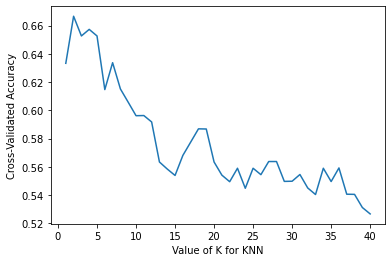

In [67]:

import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 81
k_range = range(1, 41)
k_scores = []
'''use iteration to caclulator different k in models, 
then return the average accuracy based on the cross validation'''
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.20)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(170, 9) (43, 9) (170,) (43,)


Using KNN algoithm

In [76]:
KNN = KNeighborsClassifier(n_neighbors=2)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [77]:
pred = KNN.predict(x_test)
pred

array([2, 2, 5, 2, 2, 1, 1, 5, 2, 2, 2, 1, 1, 1, 5, 1, 5, 1, 2, 2, 2, 2,
       2, 2, 7, 7, 2, 1, 7, 6, 1, 1, 1, 2, 1, 1, 2, 3, 6, 2, 2, 1, 2],
      dtype=int64)

In [78]:
from  sklearn.metrics import classification_report,confusion_matrix

In [79]:
cm=confusion_matrix(y_test,pred)
cm

array([[ 9,  3,  0,  0,  0,  0],
       [ 3, 12,  0,  1,  0,  0],
       [ 2,  0,  1,  0,  0,  0],
       [ 0,  4,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  0,  0,  2]], dtype=int64)

Text(42.0, 0.5, 'Actual')

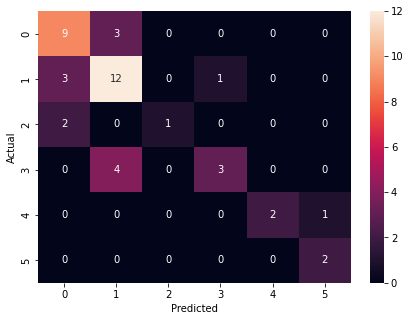

In [80]:
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [81]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.64      0.75      0.69        12
           2       0.63      0.75      0.69        16
           3       1.00      0.33      0.50         3
           5       0.75      0.43      0.55         7
           6       1.00      0.67      0.80         3
           7       0.67      1.00      0.80         2

    accuracy                           0.67        43
   macro avg       0.78      0.65      0.67        43
weighted avg       0.71      0.67      0.67        43

